In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import math
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('fivethirtyeight')

In [2]:
def plot_predictions(test, predicted, ticker):
    plt.plot(test, color='red', label=f'Real {ticker} Stock Price')
    plt.plot(predicted, color='blue', label=f'Predicted {ticker} Stock Price')
    plt.title(f'{ticker} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{ticker} Stock Price')
    plt.legend()
    plt.show()

In [3]:
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    r2 = r2_score(test, predicted)
    print(f'RMSE: {rmse}, R2 Score: {r2}')

In [4]:
def train_model(ticker_symbol):

    stock_data = yf.download(ticker_symbol, period="max") 
    first_date = stock_data.index.min()
    
    date_10 = pd.to_datetime('2010-01-01') 
    start_date = date_10 if first_date < date_10 else first_date
    end_date = datetime.now()
    data = yf.download(ticker_symbol, start=start_date, end=end_date)

    # Load dataset
    dataset = data[['High']]  # Use the 'High' price or other columns as needed

    # Split dataset into training and testing sets
    training_set = dataset[:'2016'].iloc[:, 0:1].values
    testing_set = dataset['2017':].iloc[:, 0:1].values

    # Scale data
    sc = MinMaxScaler(feature_range=(0, 1))
    training_set_scaled = sc.fit_transform(training_set)

    # Prepare data for LSTM
    x_train, y_train = [], []
    for i in range(60, len(training_set_scaled)):
        x_train.append(training_set_scaled[i-60:i, 0])
        y_train.append(training_set_scaled[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build LSTM model
    regressor = Sequential()
    regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=1))

    regressor.compile(optimizer='adam', loss='mean_squared_error')
    regressor.fit(x_train, y_train, epochs=10, batch_size=32)

    # Prepare testing data
    dataset_total = pd.concat((dataset['High'][:'2016'], dataset['High']['2017':]), axis=0)
    inputs = dataset_total[len(dataset_total) - len(testing_set) - 60:].values
    inputs = inputs.reshape(-1, 1)
    inputs = sc.transform(inputs)

    x_test = []
    for i in range(60, len(inputs)):
        x_test.append(inputs[i-60:i, 0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Predict stock prices
    predicted_stock_price = regressor.predict(x_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    # Visualize predictions for the current stock
    plot_predictions(testing_set, predicted_stock_price, ticker_symbol)

    # Evaluate the model
    return_rmse(testing_set, predicted_stock_price)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\AjayPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - loss: 0.0718
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0065
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0058
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0085
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0047
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0041
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0043
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0038
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0034
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0036
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step


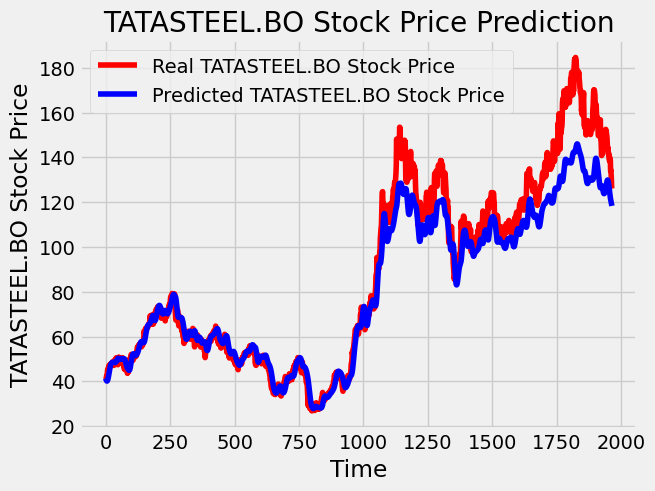

RMSE: 11.39353375908028, R2 Score: 0.9253761772862606


In [5]:
train_model('TATASTEEL.BO')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\AjayPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - loss: 0.0512
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0097
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0073
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.0063
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0091
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0059
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0058
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0061
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0069
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0050
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


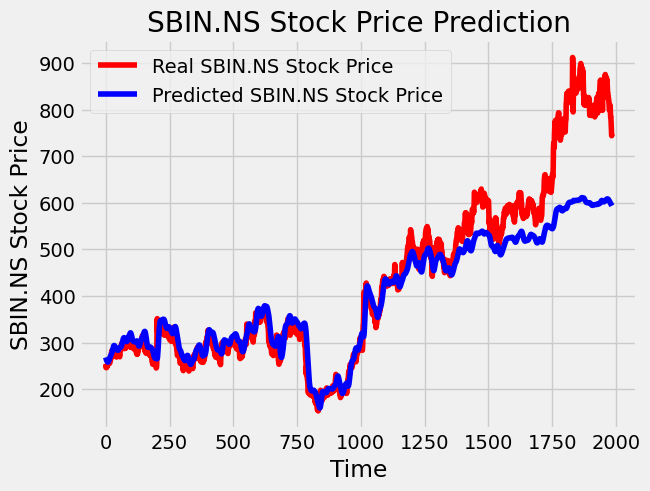

RMSE: 82.16348567355716, R2 Score: 0.810183548185784
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/s

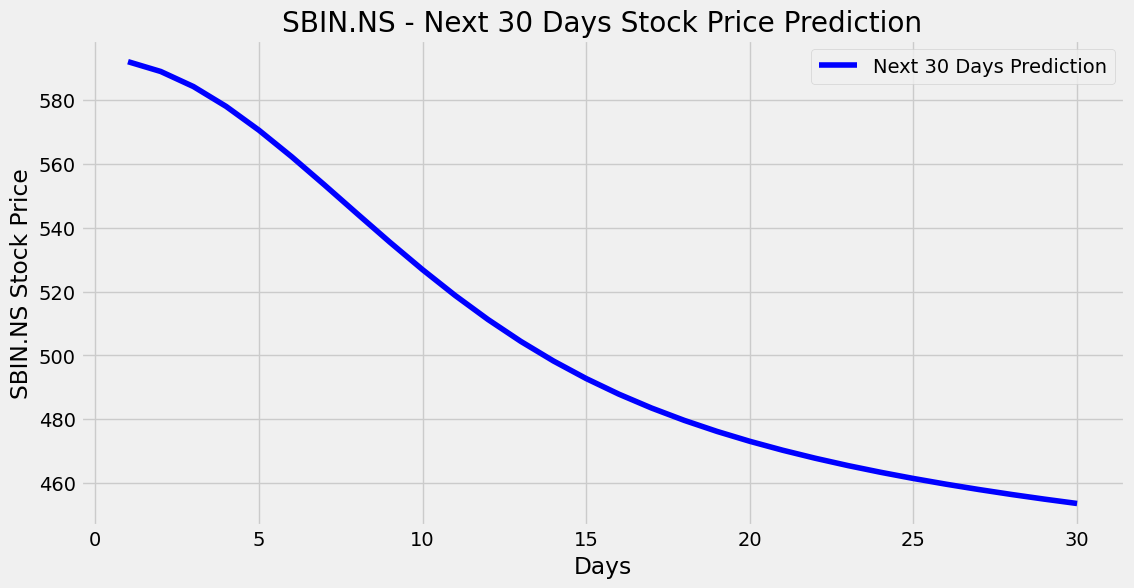

array([[591.9841 ],
       [588.909  ],
       [584.1846 ],
       [577.9592 ],
       [570.52576],
       [562.2256 ],
       [553.40405],
       [544.3849 ],
       [535.4537 ],
       [526.84393],
       [518.7304 ],
       [511.2272 ],
       [504.3922 ],
       [498.23608],
       [492.7346 ],
       [487.83978],
       [483.49084],
       [479.62292],
       [476.17224],
       [473.0802 ],
       [470.29514],
       [467.77246],
       [465.4746 ],
       [463.36993],
       [461.43234],
       [459.64014],
       [457.9749 ],
       [456.42163],
       [454.9675 ],
       [453.6018 ]], dtype=float32)

In [6]:
def predict_next_30_days(model, data, scaler, last_60_days):
    """
    Predict stock prices for the next 30 days based on the last 60 days of data.
    """
    predictions = []
    input_seq = last_60_days.copy()  # Copy to avoid modifying the original

    for _ in range(30):  # Predict the next 30 days
        input_seq = input_seq.reshape(1, input_seq.shape[0], 1)  # Reshape for LSTM input
        next_pred = model.predict(input_seq)
        predictions.append(next_pred[0, 0])  # Append the predicted value
        # Append the prediction to the sequence, maintaining the 3D shape
        input_seq = np.append(input_seq[0, 1:, :], [[next_pred[0, 0]]], axis=0)

    predictions = np.array(predictions).reshape(-1, 1)  # Convert predictions to 2D
    return scaler.inverse_transform(predictions)  # Inverse transform to original scale

# Update the train_model function
def train_model_with_future_prediction(ticker_symbol):
    # Data loading and preprocessing (same as before)
    stock_data = yf.download(ticker_symbol, period="max")
    first_date = stock_data.index.min()

    date_10 = pd.to_datetime('2010-01-01')
    start_date = date_10 if first_date < date_10 else first_date
    end_date = datetime.now()
    data = yf.download(ticker_symbol, start=start_date, end=end_date)

    dataset = data[['High']]
    training_set = dataset[:'2016'].iloc[:, 0:1].values
    testing_set = dataset['2017':].iloc[:, 0:1].values

    sc = MinMaxScaler(feature_range=(0, 1))
    training_set_scaled = sc.fit_transform(training_set)

    x_train, y_train = [], []
    for i in range(60, len(training_set_scaled)):
        x_train.append(training_set_scaled[i - 60:i, 0])
        y_train.append(training_set_scaled[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # LSTM Model
    regressor = Sequential()
    regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=1))

    regressor.compile(optimizer='adam', loss='mean_squared_error')
    regressor.fit(x_train, y_train, epochs=10, batch_size=32)

    dataset_total = pd.concat((dataset['High'][:'2016'], dataset['High']['2017':]), axis=0)
    inputs = dataset_total[len(dataset_total) - len(testing_set) - 60:].values
    inputs = inputs.reshape(-1, 1)
    inputs = sc.transform(inputs)

    x_test = []
    for i in range(60, len(inputs)):
        x_test.append(inputs[i - 60:i, 0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    predicted_stock_price = regressor.predict(x_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    # Visualize current predictions
    plot_predictions(testing_set, predicted_stock_price, ticker_symbol)
    return_rmse(testing_set, predicted_stock_price)

    # Prepare for future prediction
    last_60_days = inputs[-60:]
    next_30_days = predict_next_30_days(regressor, dataset, sc, last_60_days)

    # Visualize the next 30 days predictions
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 31), next_30_days, color='blue', label='Next 30 Days Prediction')
    plt.title(f'{ticker_symbol} - Next 30 Days Stock Price Prediction')
    plt.xlabel('Days')
    plt.ylabel(f'{ticker_symbol} Stock Price')
    plt.legend()
    plt.show()

    return next_30_days


# Call the function
train_model_with_future_prediction('SBIN.NS')
